In [1]:
!pip install py-hyperneat

In [11]:
from neat.population import Population
from neat.neural_network import NeuralNetwork
from neat.genome import Genome, Phenotype
from neat.genes import NodeGene, ConnectionGene, NodeType
from neat.neat import Neat, TrainTask
from neat.activation_functions import ActivationFunction

import numpy as np
import matplotlib.pyplot as plt
import math

In [3]:
# Select tanh function to initialize activations
tanh_function = ActivationFunction().functions['TANH']

# 10 layers
num_layers = 10

# Node genes
input_node_0 = NodeGene(0, NodeType.INPUT, tanh_function, 0)
input_node_1 = NodeGene(1, NodeType.INPUT, tanh_function, 0)
output_node = NodeGene(2, NodeType.OUTPUT, tanh_function, num_layers - 1)

nodes = [input_node_0, input_node_1, output_node]

In [4]:
# Connection genes: innovation, in node, out node, weight, enable?, in node layer, out node layer
connection_0 = ConnectionGene(0, input_node_0.gene_id, output_node.gene_id, 0.1, True, input_node_0.layer, output_node.layer)
connection_1 = ConnectionGene(1, input_node_1.gene_id, output_node.gene_id, 0.2, True, input_node_1.layer, output_node.layer)

connections = [connection_0, connection_1]

In [5]:
# Create seed genome, specify connections weight range
weights_range = (-8.0, 8.0)
genome = Genome(weights_range)

# Assemble genome from nodes and connections info. 
# Need to specify the type of phenotype to construct and number of layers
genome.create_genome_from_genes(nodes, connections, Phenotype.LAYERED_NETWORK, num_layers)

In [6]:
# Create new population
pop = Population()

# Set hyperparameters of evolution
pop.params.population_max = 100
pop.params.distance_coeff_1 = 0.6
pop.params.distance_coeff_2 = 0.6
pop.params.distance_coeff_3 = 0.06
pop.params.distance_threshold = 9.0 #Adjusted while training
pop.params.small_genome_coeff = 8
pop.params.no_crossover_offspring = 0.85

pop.params.survival_selection = True
pop.params.allow_clones = True
pop.params.survival_threshold = 0.4
pop.params.elite_offspring_param = 0.1

pop.params.min_species = 4
pop.params.max_species = 10

# Set probabilities of interspecies mating and mutations
# Interspecies probability of mate
pop.prob.interspecies_mating = 0.2

# Small organisms mutation probabilities
pop.prob.sp_new_node = 0.001
pop.prob.sp_new_connection = 0.002

# Large organisms mutation probabilities
pop.prob.lp_new_node = 0.0003
pop.prob.lp_new_connection = 0.0004

# Mutation weights and activation probabilities
pop.prob.mutation_weight = 0.1
pop.prob.mutate_activation = 0.05

# Create population of organisms from the seed genome
pop.start_population(genome)

In [7]:
# Define a fitness function.
# Current function intend to solve XOR problem, given the four possible inputs
def fitness(input_data, net):
    error = 0.0
    outputs = []

    logic = input_data[0]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[1]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[2]
    net.reset_values()
    net.input(logic)
    net.activate_net()
    error += math.fabs(1 - net.output()[0])
    outputs.append(net.output()[0])

    logic = input_data[3]
    net.input(logic)
    net.activate_net()
    error += math.fabs(net.output()[0])
    outputs.append(net.output()[0])

    return math.pow(4 - error, 2)

In [8]:
# Create an instance of Neat algorithm, 100 generations
num_generations = 100
evolution = Neat(fitness_eval=fitness, train_task=TrainTask.PREDICTION, max_generation=num_generations)

# Set population to evolutionary algorithm. Limit activation functions to tanh for this example
evolution.pop = pop
evolution.pop.activation_set.use_only_tanh()

In [12]:
# Define input sets to fit with fitness function
xor_eval = [[0, 0], [0, 1], [1, 0], [1, 1]]

# Run training
evolution.set_multi_input(xor_eval)
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 6, champion_fitness = 15.974387, avg_generation_fitness = 8.404953
Iteration #1: species = 5, champion_fitness = 15.766767, avg_generation_fitness = 8.766109
Iteration #2: species = 8, champion_fitness = 15.902283, avg_generation_fitness = 7.666154
Iteration #3: species = 9, champion_fitness = 15.415691, avg_generation_fitness = 8.327984
Iteration #4: species = 5, champion_fitness = 15.964301, avg_generation_fitness = 7.391095


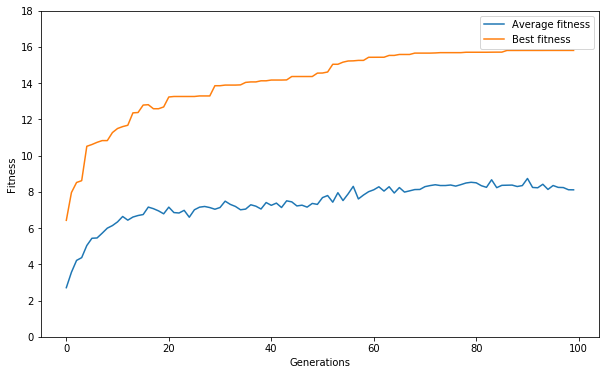

In [13]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();

In [15]:
# Let's change activation functions set
evolution.pop.activation_set = ActivationFunction()
evolution.pop.activation_set.set_atemporal_set()
evolution.pop.activation_set.unset_lin_group()

# Run training
evolution.pop.restart_population()
avg, best = evolution.run_multiple_trainings(5)

Iteration #0: species = 4, champion_fitness = 16.000000, avg_generation_fitness = 8.447862
Iteration #1: species = 7, champion_fitness = 16.000000, avg_generation_fitness = 8.665678
Iteration #2: species = 8, champion_fitness = 16.000000, avg_generation_fitness = 9.097718
Iteration #3: species = 6, champion_fitness = 16.000000, avg_generation_fitness = 8.597465
Iteration #4: species = 9, champion_fitness = 16.000000, avg_generation_fitness = 8.426233


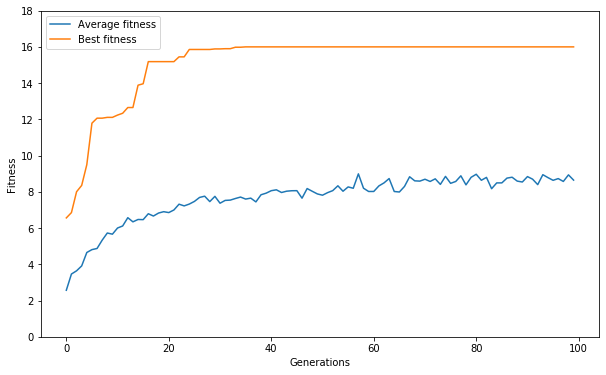

In [16]:
generations = np.linspace(0, 99, 100)

fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(generations, avg, label='Average fitness')
ax.plot(generations, best, label='Best fitness') # primer gráfico (primera sub-figura)
ax.set_ylabel('Fitness')
ax.set_xlabel('Generations')
ax.set_ylim(0, 18)
leg = ax.legend();